# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [4]:
import numpy as np
import pandas as pd
Iris_df = pd.read_csv('iris.csv',delimiter = ',')
print(Iris_df.sample(n = 10))

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
130  131            7.4           2.8            6.1           1.9   
116  117            6.5           3.0            5.5           1.8   
134  135            6.1           2.6            5.6           1.4   
87    88            6.3           2.3            4.4           1.3   
44    45            5.1           3.8            1.9           0.4   
76    77            6.8           2.8            4.8           1.4   
119  120            6.0           2.2            5.0           1.5   
147  148            6.5           3.0            5.2           2.0   
55    56            5.7           2.8            4.5           1.3   
50    51            7.0           3.2            4.7           1.4   

             Species  
130   Iris-virginica  
116   Iris-virginica  
134   Iris-virginica  
87   Iris-versicolor  
44       Iris-setosa  
76   Iris-versicolor  
119   Iris-virginica  
147   Iris-virginica  
55   Iris-versicolor  

## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [6]:
Iris_df.isnull().sum(axis=0)

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

Fill missing values with median of that particular column

In [11]:
Iris_df['SepalLengthCm'] = Iris_df['SepalLengthCm'].fillna((Iris_df['SepalLengthCm'].median()))
Iris_df['SepalWidthCm'] = Iris_df['SepalWidthCm'].fillna((Iris_df['SepalWidthCm'].median()))
Iris_df['PetalLengthCm'] = Iris_df['PetalLengthCm'].fillna((Iris_df['PetalLengthCm'].median()))
Iris_df['PetalWidthCm'] = Iris_df['PetalWidthCm'].fillna((Iris_df['PetalWidthCm'].median()))
print(Iris_df)
#Iris_df.isnull().sum(axis=0)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5           1.40           0.2   
1      2            4.9           3.0           1.40           0.2   
2      3            4.7           3.2           1.30           0.2   
3      4            4.6           3.1           1.50           0.2   
4      5            5.0           3.6           1.40           0.2   
5      6            5.4           3.9           1.70           0.4   
6      7            4.6           3.4           1.40           0.3   
7      8            5.0           3.4           1.50           0.2   
8      9            4.4           2.9           1.40           0.2   
9     10            4.9           3.1           1.50           0.1   
10    11            5.4           3.7           1.50           0.2   
11    12            4.8           3.4           1.60           0.2   
12    13            4.8           3.0           1.40           0.1   
13    14            

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Iris_df['Species']= label_encoder.fit_transform(Iris_df['Species'])
Iris_df['Species'].unique()
print(Iris_df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5           1.40           0.2        0
1      2            4.9           3.0           1.40           0.2        0
2      3            4.7           3.2           1.30           0.2        0
3      4            4.6           3.1           1.50           0.2        0
4      5            5.0           3.6           1.40           0.2        0
5      6            5.4           3.9           1.70           0.4        0
6      7            4.6           3.4           1.40           0.3        0
7      8            5.0           3.4           1.50           0.2        0
8      9            4.4           2.9           1.40           0.2        0
9     10            4.9           3.1           1.50           0.1        0
10    11            5.4           3.7           1.50           0.2        0
11    12            4.8           3.4           1.60           0.2        0
12    13    

### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

C:\Users\Nivedita\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Nivedita\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


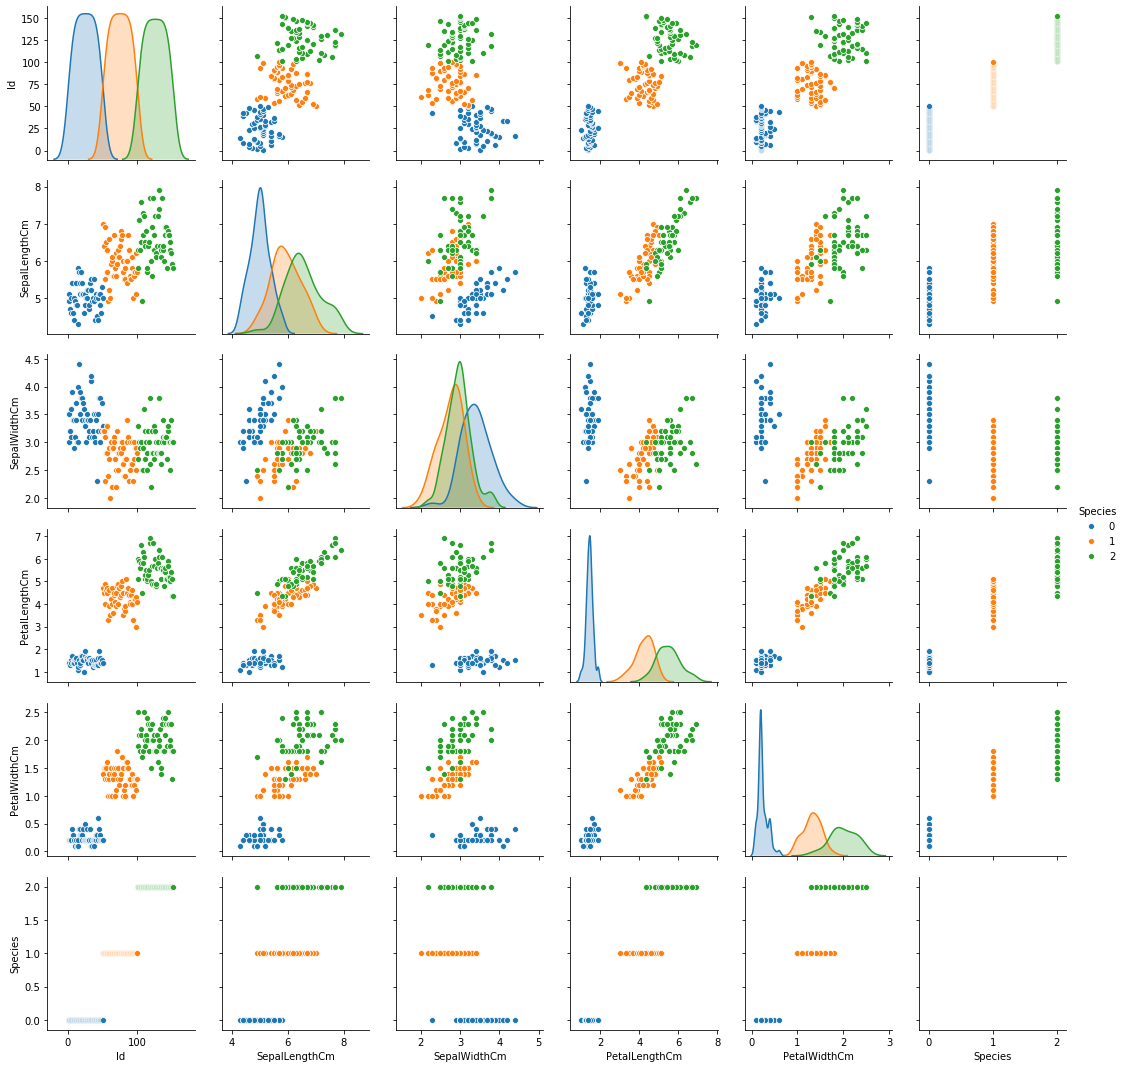

In [15]:
import seaborn as sns
sns.pairplot(Iris_df, hue="Species")

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [16]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

NameError: name 'x' is not defined

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [23]:
import pandas as pd
import numpy as np
import matplotlib as plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
cancer_df = pd.read_csv('bc2.csv',delimiter = ',')
print(cancer_df.head())

        ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0  1000025               5          1           1                  1   
1  1002945               5          4           4                  5   
2  1015425               3          1           1                  1   
3  1016277               6          8           8                  1   
4  1017023               4          1           1                  3   

   Single Epithelial Cell Size Bare Nuclei  Normal Nucleoli  Bland Chromatin  \
0                            2           1                3                1   
1                            7          10                3                2   
2                            2           2                3                1   
3                            3           4                3                7   
4                            2           1                3                1   

   Mitoses  Class  
0        1      2  
1        1      2  
2        1      2  
3     

## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [20]:
print("No. of records::",cancer_df.shape)

No. of records:: (699, 11)


In [21]:
print("Type of each column::",cancer_df.dtypes)

Type of each column:: ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object


### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [22]:
cancer_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Check Missing Values

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [24]:
cancer_df[cancer_df['Bare Nuclei'] == '?']['Bare Nuclei'].count()

16

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [28]:
Top_Value = cancer_df['Bare Nuclei'].describe(include='all').top
cancer_df['Bare Nuclei'].replace('?',Top_Value,inplace=True)
cancer_df[cancer_df['Bare Nuclei'] == '?']['Bare Nuclei'].count()

0

In [29]:
print(cancer_df)

          ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0    1000025               5          1           1                  1   
1    1002945               5          4           4                  5   
2    1015425               3          1           1                  1   
3    1016277               6          8           8                  1   
4    1017023               4          1           1                  3   
5    1017122               8         10          10                  8   
6    1018099               1          1           1                  1   
7    1018561               2          1           2                  1   
8    1033078               2          1           1                  1   
9    1033078               4          2           1                  1   
10   1035283               1          1           1                  1   
11   1036172               2          1           1                  1   
12   1041801               5          

### Question 5
#### Find the distribution of target variable (Class) 

In [30]:
cancer_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

#### Plot the distribution of target variable using histogram

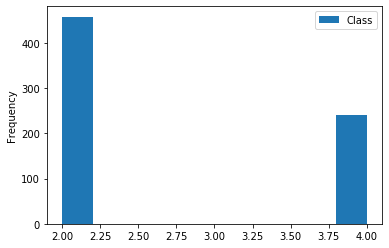

In [31]:
cancer_df['Class'].plot(kind='hist',legend=True)

#### Convert the datatype of Bare Nuclei to `int`

In [32]:
cancer_df['Bare Nuclei'] = pd.to_numeric(cancer_df['Bare Nuclei'])
cancer_df.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

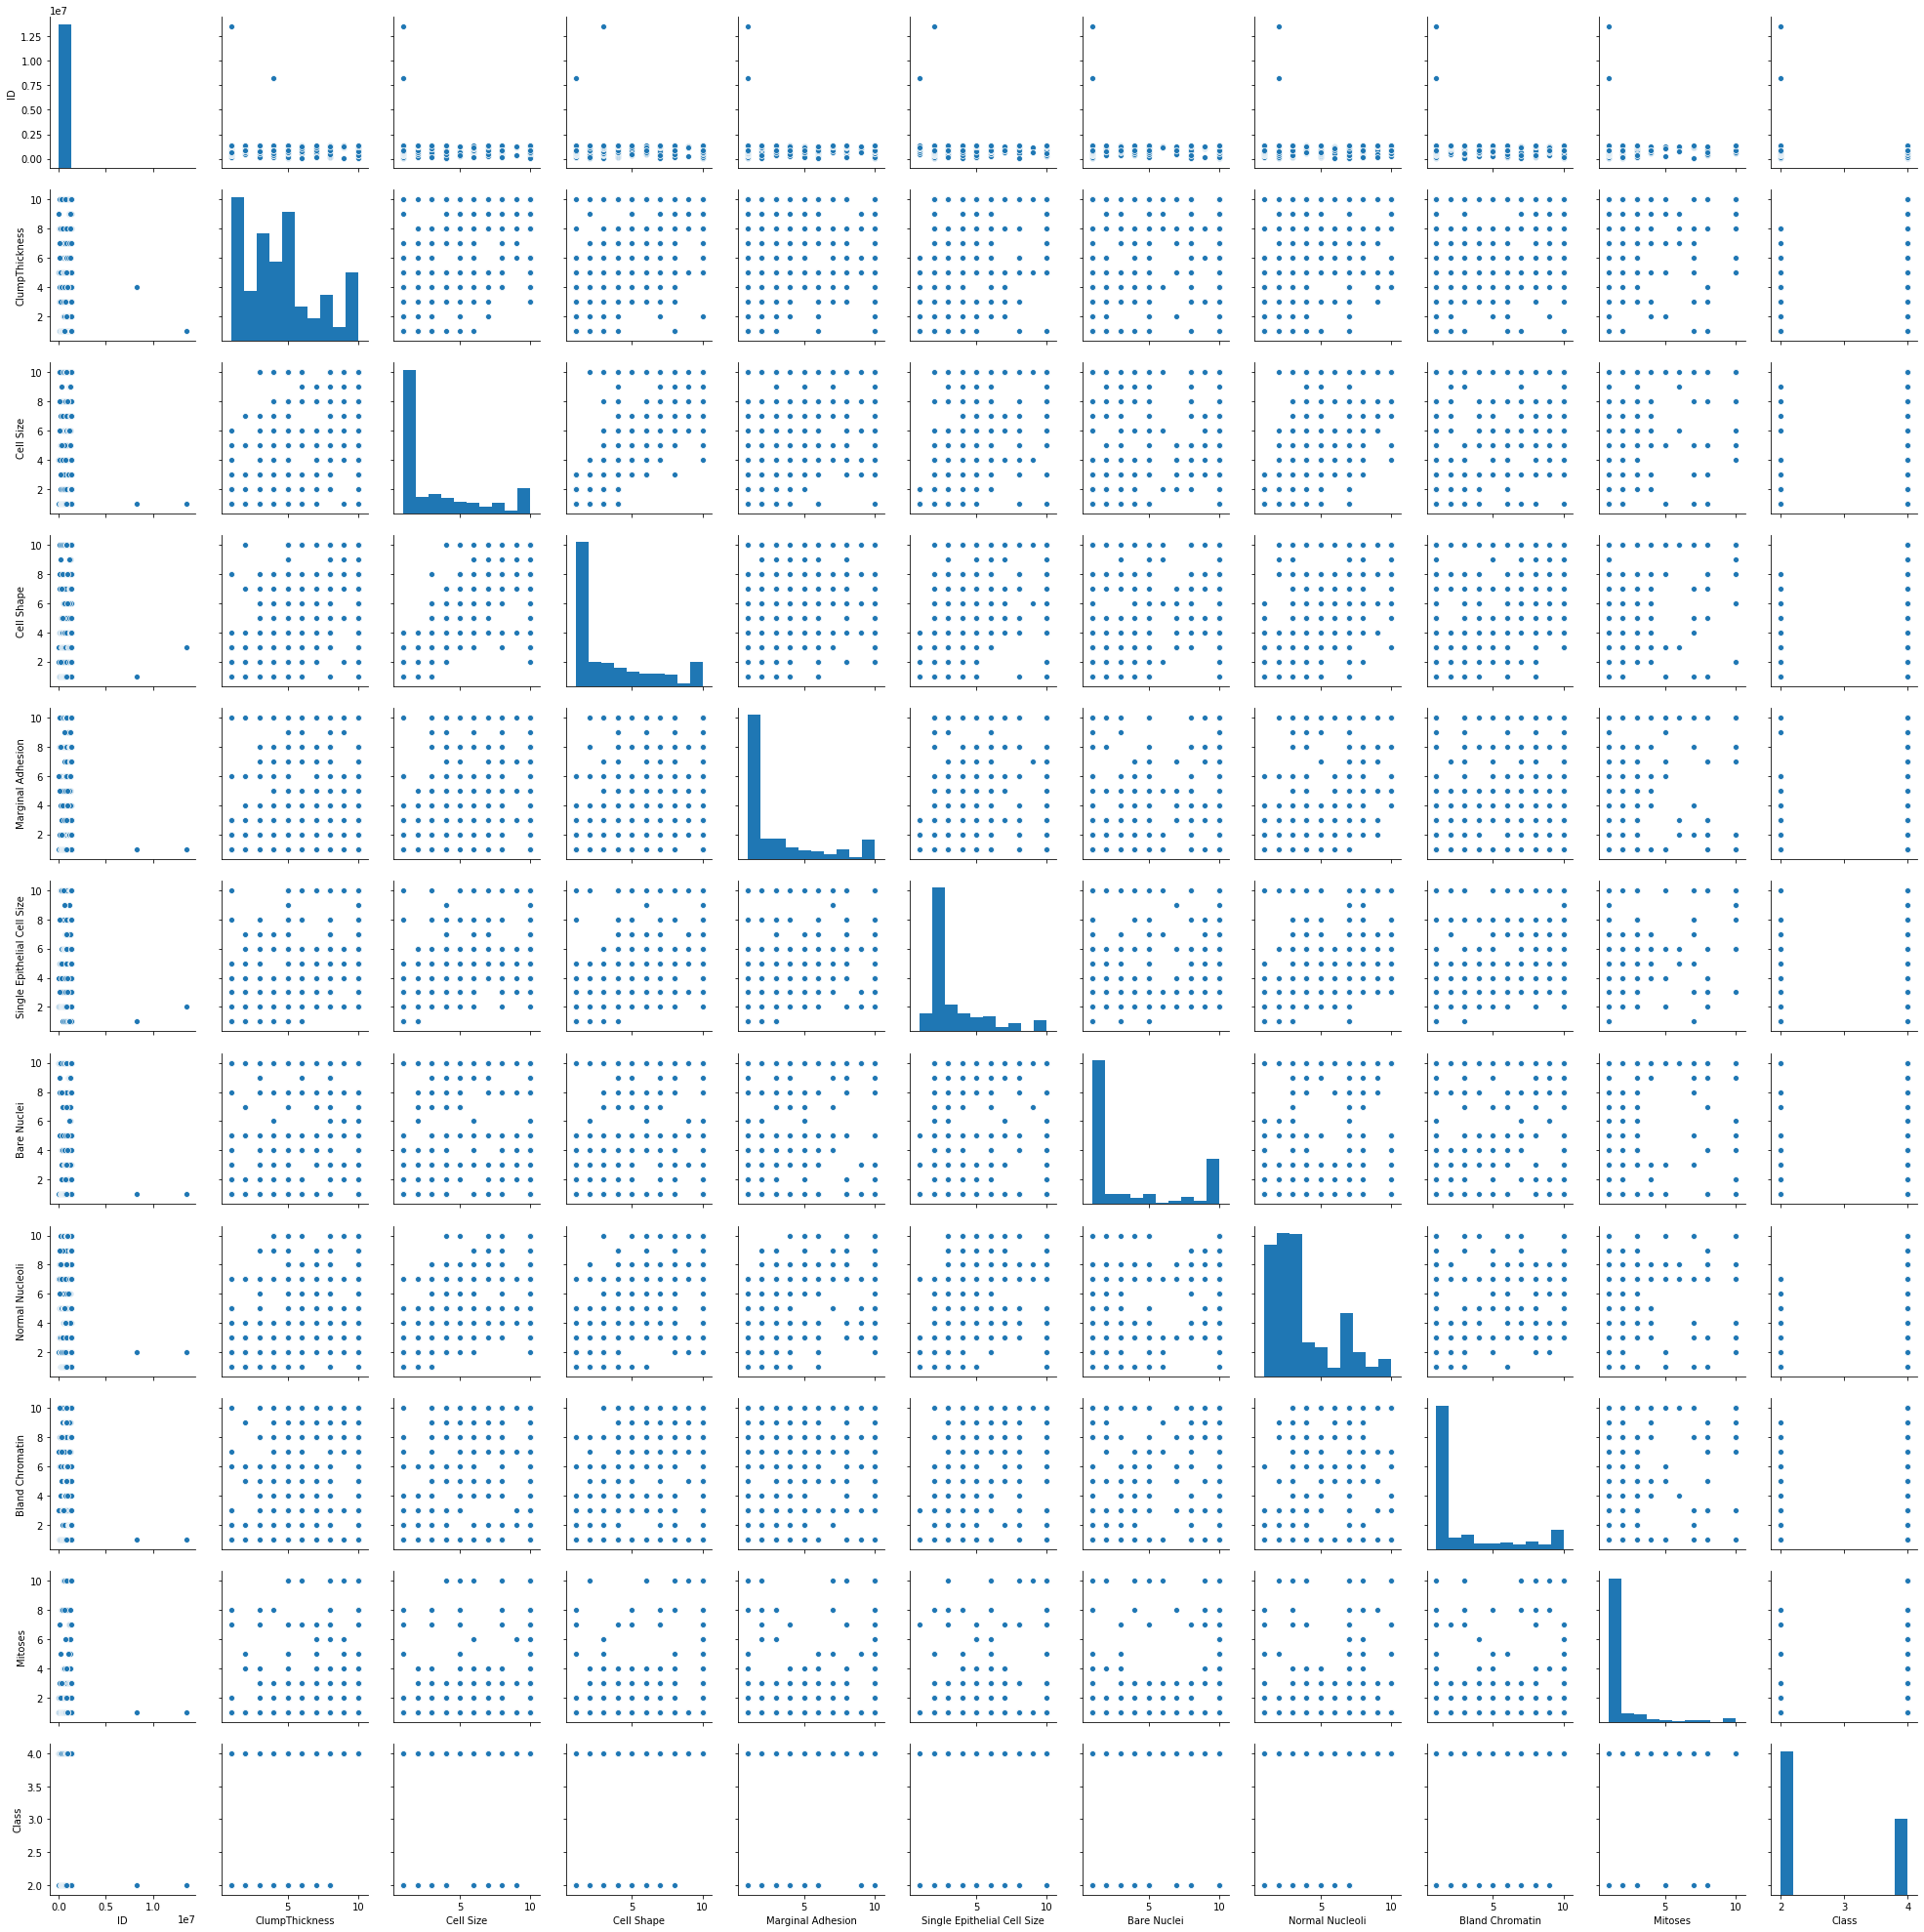

In [39]:
sns.pairplot(cancer_df)

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [40]:
X=cancer_df.drop('Class',axis=1)
y=cancer_df['Class']

#### Divide the Training and Test sets in 70:30 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [42]:
knn=KNeighborsClassifier(n_neighbors=5)
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [43]:
for k in [3,5,9]:
    knn=KNeighborsClassifier(n_neighbors=k)
    print("for k=",k)
    knn.fit(scaledX_train,y_train)
    print("What is the Testing Accuracy")
    print(knn.score(scaledX_test,y_test))
    print("\n")
    print("What is the Training Accuracy")
    print(knn.score(scaledX_train,y_train))
    predicted = knn.predict(scaledX_test)
    print("\n")

for k= 3
What is the Testing Accuracy
0.9619047619047619


What is the Training Accuracy
0.967280163599182


for k= 5
What is the Testing Accuracy
0.9761904761904762


What is the Training Accuracy
0.967280163599182


for k= 9
What is the Testing Accuracy
0.9619047619047619


What is the Training Accuracy
0.9631901840490797




## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [44]:
neighbors = np.arange(1, 20,step=2)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(30):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        #print("",accuracy_score(Y_test,Y_train))
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)

for i,k in enumerate(neighbors):
    print("K = ",k,": Train accuracy = ",train_accuracy_plot[i],"Test accuracy = ",test_accuracy_plot[i],"Diff=",\
         abs(train_accuracy_plot[i]-test_accuracy_plot[i]))

K =  1 : Train accuracy =  1.0 Test accuracy =  0.9523809523809523 Diff= 0.04761904761904767
K =  3 : Train accuracy =  0.9772324471710975 Test accuracy =  0.9588888888888886 Diff= 0.018343558282208905
K =  5 : Train accuracy =  0.9719836400817994 Test accuracy =  0.9619047619047618 Diff= 0.010078878177037565
K =  7 : Train accuracy =  0.9706203135650985 Test accuracy =  0.9630158730158728 Diff= 0.0076044405492257106
K =  9 : Train accuracy =  0.969461486025903 Test accuracy =  0.963333333333333 Diff= 0.006128152692569944
K =  11 : Train accuracy =  0.9692569870483979 Test accuracy =  0.9636507936507936 Diff= 0.005606193397604264
K =  13 : Train accuracy =  0.9688479890933877 Test accuracy =  0.9641269841269839 Diff= 0.004721004966403708
K =  15 : Train accuracy =  0.9692569870483979 Test accuracy =  0.9633333333333332 Diff= 0.005923653715064758
K =  17 : Train accuracy =  0.9695978186775732 Test accuracy =  0.9630158730158728 Diff= 0.00658194566170045
K =  19 : Train accuracy =  0.968

## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

Text(0, 0.5, 'Accuracy')

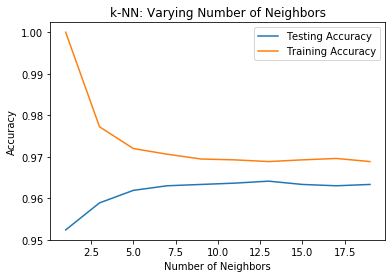

In [45]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')